In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
def mostrar(X, c=None, centroids=None,i=0,j=0):

    # Creamos los mapas de colores a utilizar
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#FFFF00', '#0000FF'])

    # Creamos la figura
    plt.figure(figsize=(10,8))

    # Pintamos los puntos
    plt.scatter(X.iloc[:, i], X.iloc[:, j], c=c, cmap=cmap_bold, s=60)

    # Pintamos los centroides si los hay 
    # ligero cambios con respecto a la función del notebook anterior
    if centroids is not None:
        plt.scatter(centroids[:,i], centroids[:,j], marker='*', c=range(centroids.shape[0]), s=500)

    # Mostramos la figura
    plt.show()

In [ ]:
!wget  www.ugr.es/~isaaktriguero/data/iris.csv

--2022-11-02 19:07:50--  http://www.ugr.es/~isaaktriguero/data/iris.csv
Resolving www.ugr.es (www.ugr.es)... 150.214.27.71
Connecting to www.ugr.es (www.ugr.es)|150.214.27.71|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4616 (4.5K) [text/csv]
Saving to: ‘iris.csv.1’

iris.csv.1          100%[===================>]   4.51K  --.-KB/s    in 0s      

2022-11-02 19:07:51 (308 MB/s) - ‘iris.csv.1’ saved [4616/4616]



In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
df = pd.read_csv('iris.csv')

In [ ]:
df.shape

(150, 5)

In [ ]:
df = df.drop(columns=['class'])

In [ ]:
df.shape

(150, 4)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(df)

MinMaxScaler()

In [ ]:
results_norm = scaler.transform(df)

In [ ]:
type(results_norm)

numpy.ndarray

In [ ]:
df_norm = pd.DataFrame(results_norm, index=df.index, columns=df.columns)

In [ ]:
df_norm.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.440556,0.467458,0.458056
std,0.230018,0.181611,0.299203,0.317599
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=12345).fit(df_norm)

In [ ]:
c = kmeans.labels_

In [ ]:
kmeans.inertia_

6.982216473785236

In [ ]:
centros = kmeans.cluster_centers_

In [ ]:
centros

array([[0.19611111, 0.595     , 0.07830508, 0.06083333],
       [0.44125683, 0.30737705, 0.57571548, 0.54918033],
       [0.70726496, 0.4508547 , 0.79704476, 0.82478632]])

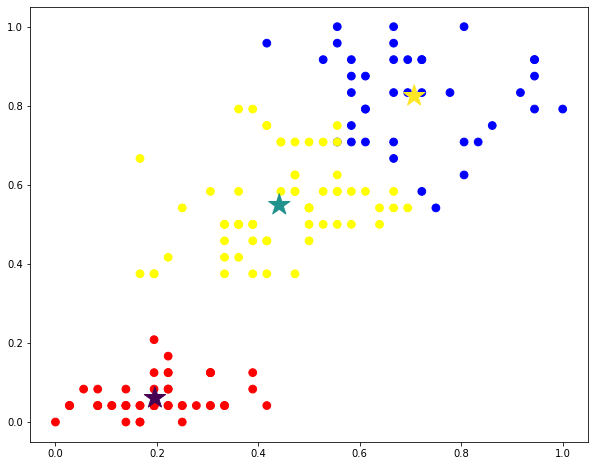

In [ ]:
mostrar(df_norm, c, centros, i=0, j= 3)

In [ ]:
errores = []
for i in range(1,17):
  kmeans = KMeans(n_clusters=i, random_state=12345).fit(df_norm)
  errores += [kmeans.inertia_]

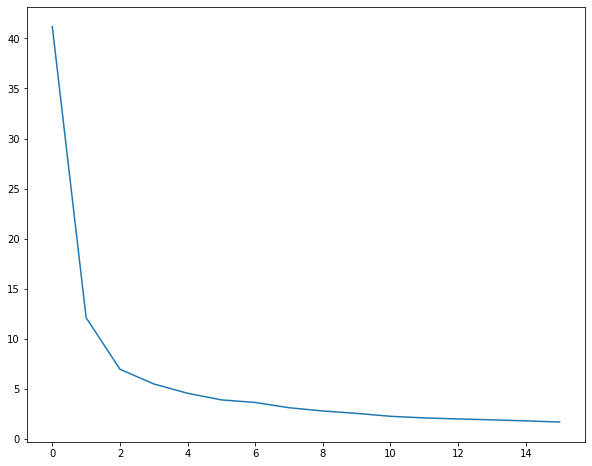

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(errores)
plt.show()

In [ ]:
errores

[41.166110421373276,
 12.127790750538196,
 6.982216473785236,
 5.516933472040369,
 4.5839407993118995,
 3.9248256390278495]

In [ ]:
!pip install scikit-learn-extra

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 25.4 MB/s 


In [ ]:
from sklearn_extra.cluster import KMedoids

In [ ]:
kmedoids = KMedoids(n_clusters=3, random_state=12345).fit(df_norm)
centros=kmedoids.cluster_centers_
etiquetas=kmedoids.labels_

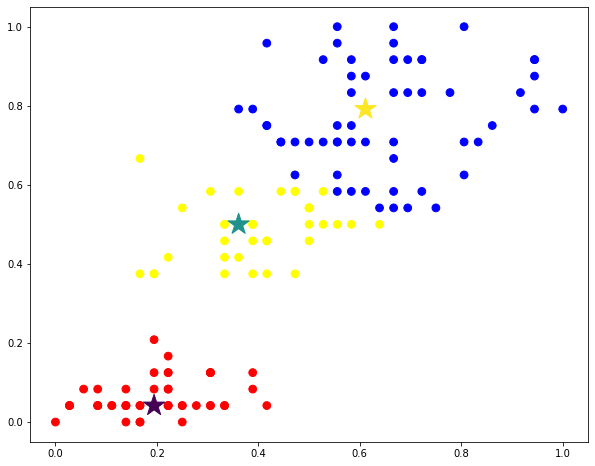

In [ ]:
mostrar(df_norm, etiquetas, centros, i=0,j=3)